In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import glob

In [3]:
fdir = '/data2/GBT/S140/'

In [4]:
fnamesA = glob.glob(fdir+'Daisy/*/*_03_*A*rfireduced.npz')
fnamesA.sort()
print len(fnamesA)

24


In [5]:
fdiode, pdiode = np.load('lownoise_calibration_3C295_03_A.npy')

In [6]:
nz = np.load(fnamesA[5])
mask = nz['valid']
gain = pdiode / ( nz['xxon'] - nz['xxoff'])
ratio = nz['xxoff'] / nz['xxon']
calibd = (nz['xxoff'] * gain)
ele = nz['ELEVATIO'][::8]
freqs = nz['freqs']

In [7]:
gain.shape

(7081, 512)

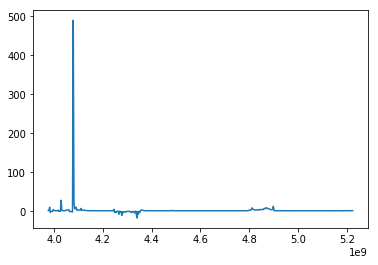

In [8]:
plot(nz['freqs'], calibd.max(0) / calibd.min(0))

/usr/lib/python2.7/site-packages/ipykernel/__main__.py:1: RuntimeWarning: Mean of empty slice
  if __name__ == '__main__':


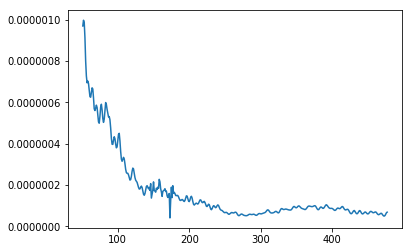

In [9]:
plot(np.nanmean(gain, 0))

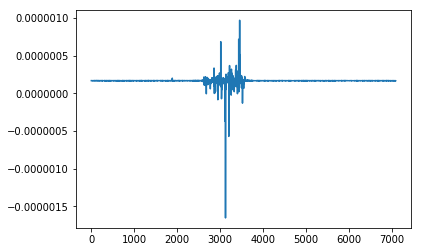

In [10]:
plot(np.nanmean(gain, 1))

/usr/lib/python2.7/site-packages/ipykernel/__main__.py:1: RuntimeWarning: Mean of empty slice
  if __name__ == '__main__':


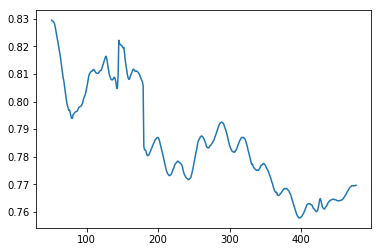

In [11]:
plot(np.nanmean(ratio, 0))

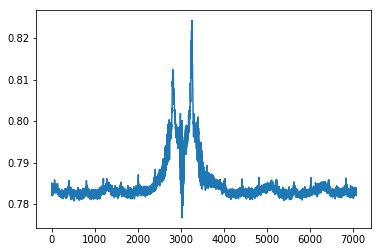

In [12]:
plot(np.nanmean(ratio, 1))

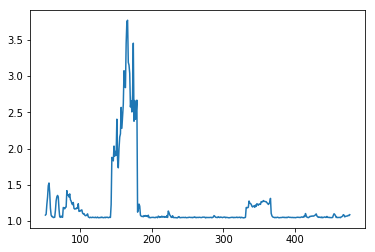

In [14]:
plot(ratio.max(0) / ratio.min(0))

In [26]:
sigma = np.sqrt(2.) / np.sqrt(1500.e6 / 512. * 0.02)

In [27]:
print sigma

0.00584237394672


In [28]:
noiseratio = ratio.std(0) / ratio.mean(0)

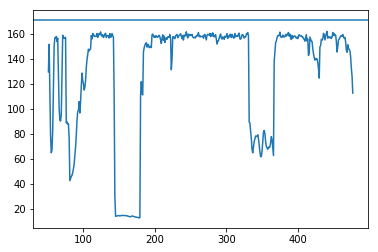

In [37]:
plot(ratio.mean(0) / ratio.std(0))
axhline(1. / sigma)

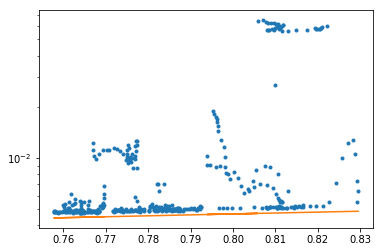

In [41]:
semilogy(ratio.mean(0), ratio.std(0), '.')
plot(ratio.mean(0), ratio.mean(0) * sigma)

In [88]:
print sigma

0.00584237394672


(0, 0.1)

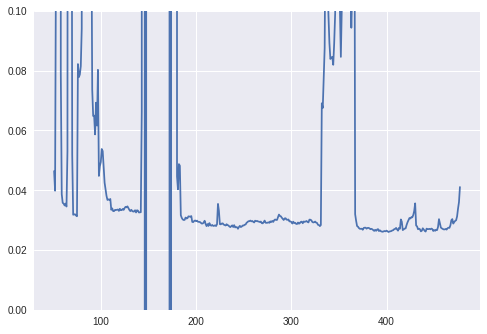

In [87]:
plot(calibd.std(0) / calibd.mean(0))
ylim(0, 0.1)

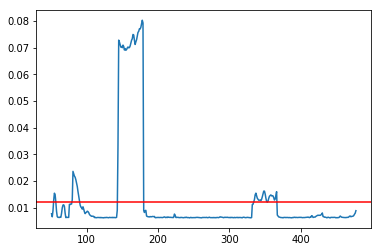

In [29]:
plot(ratio.std(0) / ratio.mean(0))
axhline(np.nanmedian(noiseratio) + sigma, color='r')

In [30]:
np.nanmedian(noiseratio) / sigma

1.0927399294277333

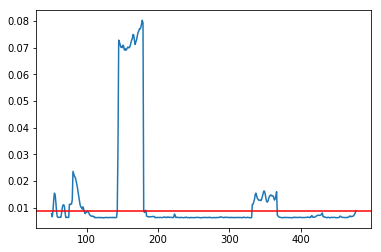

In [35]:
plot(ratio.std(0) / ratio.mean(0))
axhline(1.5 * sigma, color='r')

In [63]:
calibd

array([[ nan,  nan,  nan, ...,  nan,  nan,  nan],
       [ nan,  nan,  nan, ...,  nan,  nan,  nan],
       [ nan,  nan,  nan, ...,  nan,  nan,  nan],
       ..., 
       [ nan,  nan,  nan, ...,  nan,  nan,  nan],
       [ nan,  nan,  nan, ...,  nan,  nan,  nan],
       [ nan,  nan,  nan, ...,  nan,  nan,  nan]])

In [85]:
np.histogram??

In [79]:
allhist = []
bins = np.linspace(-.1, 0.1, 50)
for k in range(512):
    try:
        allhist.append(np.histogram(calibd[:,k] / np.median(calibd[:,k]) - 1., bins=bins)[0])
    except ValueError:
        pass
allhist = np.array(allhist)

/usr/lib64/python2.7/site-packages/numpy/lib/function_base.py:3858: RuntimeWarning: Invalid value encountered in median
  r = func(a, **kwargs)


In [80]:
allhist.shape

(427, 49)

In [81]:
allhist

array([[10, 18, 23, ..., 42, 26, 34],
       [ 5,  6,  8, ..., 27, 20,  9],
       [ 7,  5,  7, ..., 26, 21, 14],
       ..., 
       [ 0,  1,  1, ...,  9,  6,  3],
       [ 0,  0,  4, ...,  6,  5,  6],
       [ 1,  1,  3, ...,  8,  9,  6]])

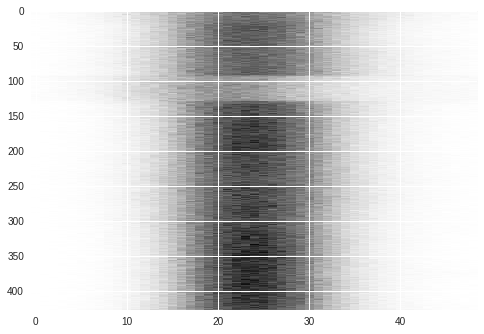

In [82]:
imshow(allhist, aspect='auto')

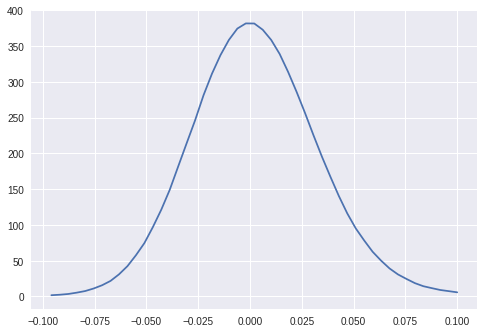

In [83]:
plot(bins[1:], allhist.mean(0))

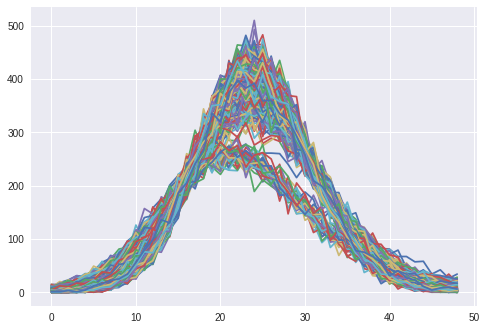

In [84]:
plot(allhist.T);

In [56]:
import seaborn as sns

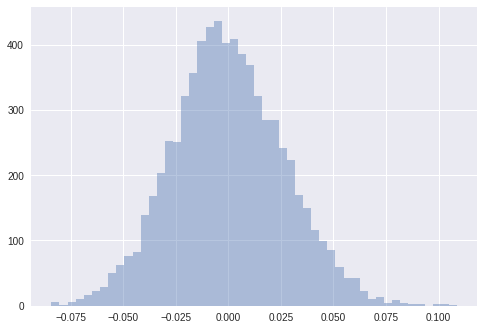

In [60]:
sns.distplot(calibd[:, 400] / calibd[:, 400].mean() -1 , kde=False)

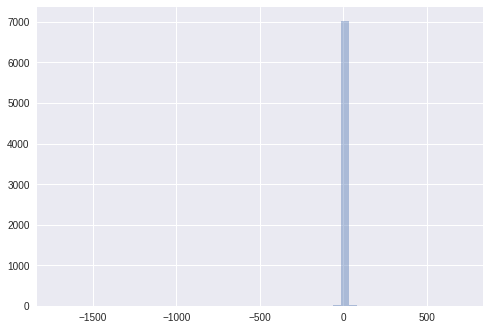

In [59]:
sns.distplot(calibd[:, 170] / calibd[:, 400].mean(), kde=False)

In [42]:
bad = noiseratio > ( np.nanmedian(noiseratio) + sigma )

/usr/lib/python2.7/site-packages/ipykernel/__main__.py:1: RuntimeWarning: invalid value encountered in greater
  if __name__ == '__main__':


In [43]:
mask[bad] = False

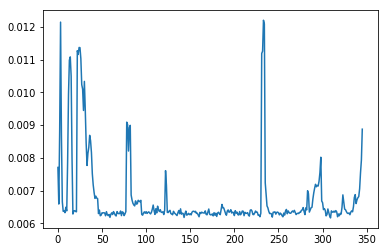

In [44]:
plot(noiseratio[mask])

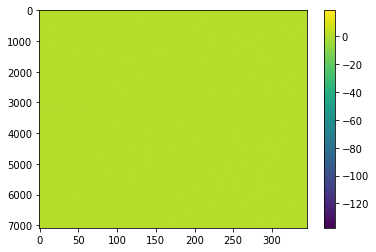

In [45]:
imshow(gain[:, mask] / gain[:, mask].mean(0), aspect='auto')
colorbar()

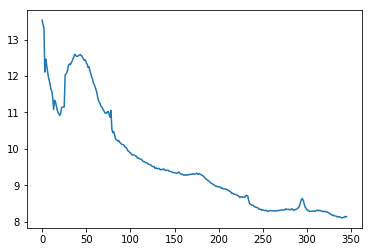

In [46]:
plot(calibd[:, mask].mean(0))

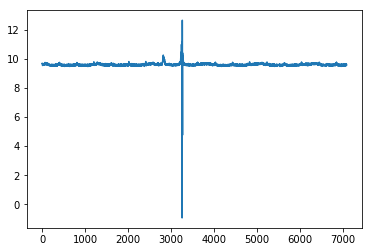

In [47]:
plot(calibd[:, mask].mean(1))

/usr/lib/python2.7/site-packages/ipykernel/__main__.py:1: RuntimeWarning: Mean of empty slice
  if __name__ == '__main__':


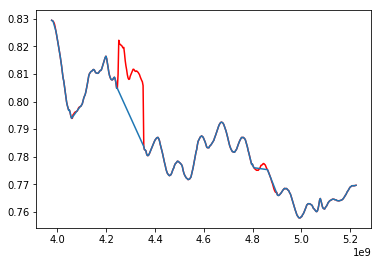

In [48]:
plot(freqs, np.nanmean(ratio, 0), 'r')
plot(freqs[mask], np.nanmean(ratio[:,mask], 0))

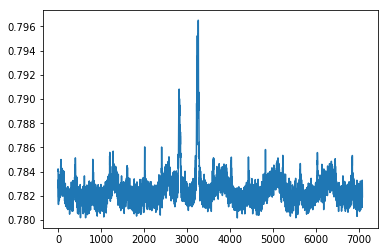

In [49]:
plot(np.nanmean(ratio[:, mask], 1))

/usr/lib/python2.7/site-packages/ipykernel/__main__.py:1: RuntimeWarning: Mean of empty slice
  if __name__ == '__main__':


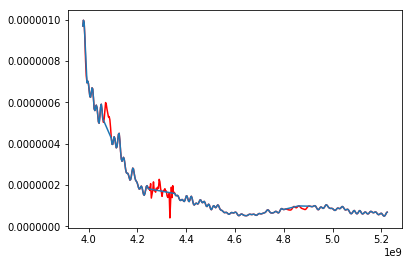

In [50]:
plot(freqs, np.nanmean(gain, 0), 'r')
plot(freqs[mask], np.nanmean(gain[:,mask], 0))

In [51]:
gainmedian = np.nanmedian(np.nanmean(gain[:, mask], 1))
gainstd = np.nanstd(np.nanmean(gain[:, mask], 1))

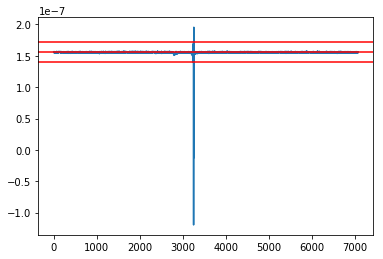

In [52]:
plot(np.nanmean(gain[:, mask], 1))
axhline(gainmedian, color='r')
axhline(gainmedian + 4. * gainstd, color='r')
axhline(gainmedian - 4. * gainstd, color='r')

In [53]:
tmask = np.abs(np.nanmean(gain[:, mask], 1) - gainmedian) < (4. * gainstd)

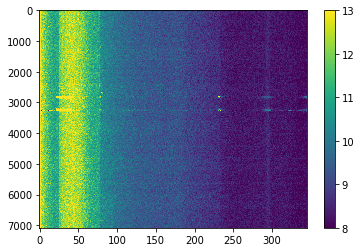

In [54]:
imshow(calibd[:, mask], aspect='auto')
colorbar()
clim(8, 13)

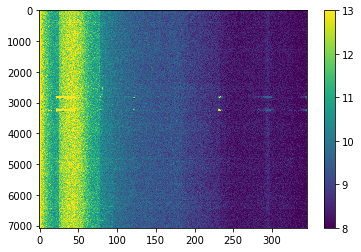

In [55]:
imshow(calibd[tmask,:][:,mask], aspect='auto')
colorbar()
clim(8, 13)

In [92]:
ele.shape

(7081,)

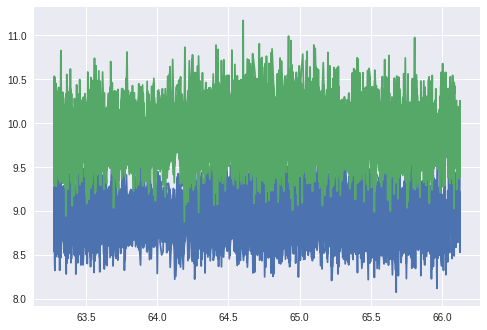

In [102]:
plot(ele[tmask], calibd[tmask,:][:,mask][:,200])
plot(ele[tmask], calibd[tmask,:][:,mask][:,100])

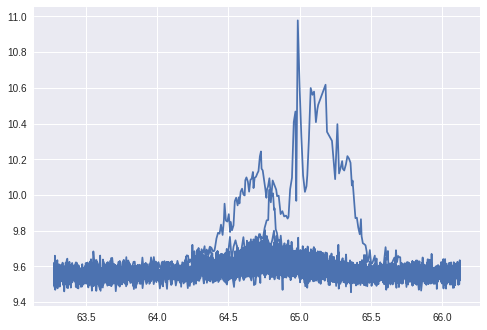

In [104]:
plot(ele[tmask], np.nanmean(calibd[tmask,:][:,mask], 1))

In [ ]:
plot(ele, np.nanmean(calibd))

(5, 14)

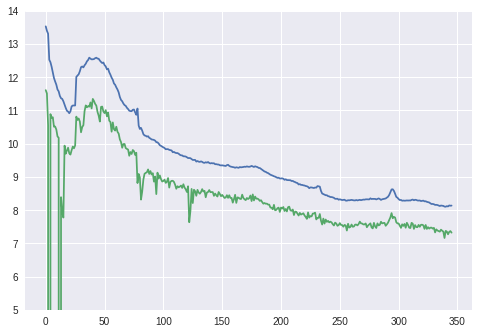

In [90]:
plot(calibd[tmask,:][:,mask].mean(0))
plot(calibd[tmask,:][:,mask].min(0))
ylim(5, 14)

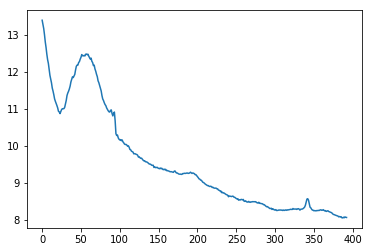

In [32]:
plot(calibd[tmask,:][:,mask].mean(0))

In [33]:
ts = np.arange(calibd.shape[0])

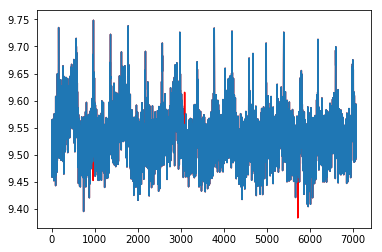

In [34]:
plot(ts, calibd[:, mask].mean(1), 'r')
plot(ts[tmask], calibd[tmask,:][:,mask].mean(1))